In [79]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [45]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,contacts,experience,education,certifications,skills,courses,languages
0,0,272,"['Coordinador de seguridad', 'Supervisor de op...",[],[],[],[],['Español']
1,1,368,"['Gerente', 'Grupo La República Publicaciones'...","['Universidad Rey Juan Carlos', 'Universidad N...",[],"['Inteligencia empresarial', 'Business Intelli...",[],['Español']
2,2,Más de 500,"['Data Architect Senior', 'Senior Data Archite...","['Universidad Nacional de Ingeniería', 'OBS Bu...",['Microsoft Certified: Azure Data Fundamentals...,"['Metodologías ágiles', 'Liderazgo de equipos'...",[],['Ingles']
3,3,133,"['Interbank', 'Practicante']",['Universidad Nacional de Ingeniería'],[],"['Python', 'PL/SQL', 'Microsoft Excel', 'Análi...",[],['Español']
4,4,145,"['Coordinador de Canales Externos', 'Coordinad...",['Instituto SISE'],['Gestión de Proyectos con Metodologías Ágiles...,"['Liderazgo', 'Análisis de datos', 'Microsoft ...",[],['Español']
...,...,...,...,...,...,...,...,...
995,995,153,"['Docente', 'Research Analyst', 'Research Anal...","['Universidad Nacional del Callao', 'National ...",[],"['Investigación', 'Análisis de datos', 'Econom...",[],['Inglés']
996,996,292,"['Co-founder', 'Consultor de marketing digital...",['Universidad de San Martín de Porres'],[],"['Capacidad de análisis', 'Liderazgo de equipo...","['Affiliads - Yonnathan Vinasco - Colombia', '...",['Inglés']
997,997,500+,"['Senior Product Manager', 'DIRECTV Latin Amer...",['UTEC - Universidad de Ingeniería y Tecnologí...,"['Transformación digital: Cómo implementarla',...","['Rentabilidad', 'Product Management', 'Planif...",[],"['Inglés', 'Portugues']"
998,998,352,"['Analista de datos', 'Asistente Administrativ...","['Universidad Nacional Agraria La Molina', 'DM...","['Advanced Business Intelligence', 'B2 francai...","['Business intelligence', 'Inglés', 'Francés',...",[],['Español']


#Preprocesamiento

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   0.0             1000 non-null   float64
 1   name            992 non-null    object 
 2   contacts        992 non-null    object 
 3   link            1000 non-null   object 
 4   experience      1000 non-null   object 
 5   education       1000 non-null   object 
 6   certifications  1000 non-null   object 
 7   skills          1000 non-null   object 
 8   courses         1000 non-null   object 
 9   languages       1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


In [69]:
'''
Experience
Education
Skills
Courses
Certifications
'''
def format_column(val):
  characters = r"'[]"+'"'
  valor = ''.join( x for x in val if x not in characters)
  arr = valor.split(',')
  new_arr = list(filter(None, arr))
  return len(new_arr)

def format_column2(val):
  characters = r"'[]"+'"'
  valor = ''.join( x for x in val if x not in characters).lower()
  arr = valor.split(',')
  new_arr = list(filter(None, arr))
  return new_arr

def format_contacts(val): 
  nro = re.findall('[0-9]+',str(val))
  if len(nro) > 0:
    return int(nro[0])
  else:
    return 0

key_spanish = 'espa'
key_english = 'ngl'
key_portugues = 'portugu'
def format_languages(val):
  characters = r"'[]"+'"'
  valor = ''.join( x for x in val if x not in characters).lower()
  
  score = ''
  score += '1' if valor.count(key_portugues) else '0'
  score += '1' if valor.count(key_english) else '0'
  score += '1'
  return score


def english_study(val):
  characters = r"'[]"+'"'
  valor = ''.join( x for x in val if x not in characters).lower()
  if val.count(key_english):
    return 'inglés'
  else: 
    return 'español'

# university
# universidad
key_university = 'universi'
def university_study(val):
  val = val.lower()
  if val.count(key_university):
    return 'universidad'
  else: 
    return 'otro'

def category_contacts(val):
  range = [500,400,300,200,100,50,0]
  count = format_contacts(val)
  for x in range:
    if count > x: return x


In [70]:
DF_COUNT = pd.DataFrame()
DF_COUNT['contacts']              = df['contacts'].apply(format_contacts)
DF_COUNT['category_contacts']     = df['contacts'].apply(category_contacts)
DF_COUNT['count_experience']      = df['experience'].apply(format_column)
DF_COUNT['count_education']       = df['education'].apply(format_column)
DF_COUNT['count_certifications']  = df['certifications'].apply(format_column)
DF_COUNT['count_courses']         = df['courses'].apply(format_column)
DF_COUNT['count_skills']          = df['skills'].apply(format_column)
DF_COUNT['count_languages']       = df['languages'].apply(format_languages)
DF_COUNT['university_study']      = df['education'].apply(university_study)
DF_COUNT['english_study']         = df['languages'].apply(english_study)

DF_COUNT['count_languages'].astype(int)
DF_COUNT['contacts'].astype(int)

0      272
1      368
2      500
3      133
4      145
      ... 
995    153
996    292
997    500
998    352
999    183
Name: contacts, Length: 1000, dtype: int64

In [48]:
DF_COUNT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   contacts              1000 non-null   int64  
 1   category_contacts     992 non-null    float64
 2   count_experience      1000 non-null   int64  
 3   count_education       1000 non-null   int64  
 4   count_certifications  1000 non-null   int64  
 5   count_courses         1000 non-null   int64  
 6   count_skills          1000 non-null   int64  
 7   count_languages       1000 non-null   object 
 8   university_study      1000 non-null   object 
 9   english_study         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.2+ KB


In [49]:
DF_COUNT

,contacts,category_contacts,count_experience,count_education,count_certifications,count_courses,count_skills,count_languages,university_study,english_study
0,272,200.0,7,0,0,0,0,001,otro,español
1,368,300.0,6,3,0,0,38,001,universidad,español
2,500,400.0,6,9,7,0,51,011,universidad,ingles
3,133,100.0,2,1,0,0,28,001,universidad,español
4,145,100.0,6,1,7,0,43,001,otro,español
...,...,...,...,...,...,...,...,...,...,...
995,153,100.0,8,3,0,0,11,011,universidad,ingles
996,292,200.0,7,1,0,6,11,011,universidad,ingles
997,500,400.0,5,8,2,0,11,111,universidad,ingles
998,352,300.0,4,3,7,0,11,001,universidad,español


In [50]:
DF_COUNT.describe()

,contacts,category_contacts,count_experience,count_education,count_certifications,count_courses,count_skills
count,1000.00000,992.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,243.01600,187.096774,4.988000,2.854000,2.818000,1.137000,15.607000
std,210.66315,158.623108,2.758526,2.203529,4.616946,2.921089,15.368954
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.75000,50.000000,3.000000,1.000000,0.000000,0.000000,11.000000
50%,188.00000,100.000000,5.000000,2.000000,0.000000,0.000000,11.000000
75%,425.00000,400.000000,6.250000,4.000000,4.000000,0.000000,11.000000
max,1295.00000,500.000000,14.000000,11.000000,27.000000,19.000000,95.000000


In [51]:
A = DF_COUNT[DF_COUNT.contacts > 200]
A.count()

contacts                473
category_contacts       473
count_experience        473
count_education         473
count_certifications    473
count_courses           473
count_skills            473
count_languages         473
university_study        473
english_study           473
dtype: int64

# 1° Analytical task


In [62]:
group_expecience = DF_COUNT.groupby(['university_study']).mean()['count_experience']
group_expecience

university_study
otro           4.408451
universidad    5.083916
Name: count_experience, dtype: float64

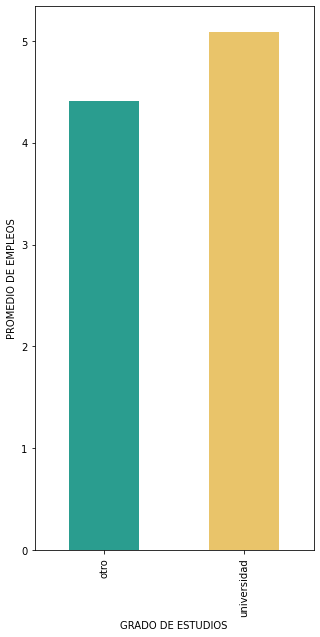

In [63]:
group_expecience.plot(kind = 'bar', color=['#2a9d8f','#e9c46a'], title='', xlabel='GRADO DE ESTUDIOS', ylabel='PROMEDIO DE EMPLEOS', figsize=(5,10))

In [55]:
fig = px.pie(DF_COUNT, names = "university_study", title = "ESTUDIOS", hole = 0.5,
            width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

# 2° Analytical task
Analizar la importancia del idioma inglés en el campo del análisis de datos.


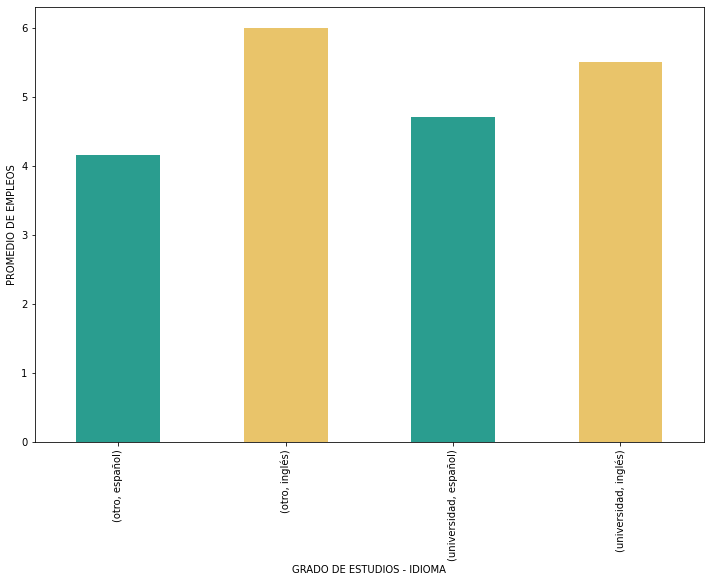

In [71]:
group_expecience = DF_COUNT.groupby(['university_study','english_study']).mean()['count_experience']
group_expecience.plot(kind = 'bar', color=['#2a9d8f','#e9c46a'],  title='', xlabel='GRADO DE ESTUDIOS - IDIOMA', ylabel='PROMEDIO DE EMPLEOS', figsize=(12,8))

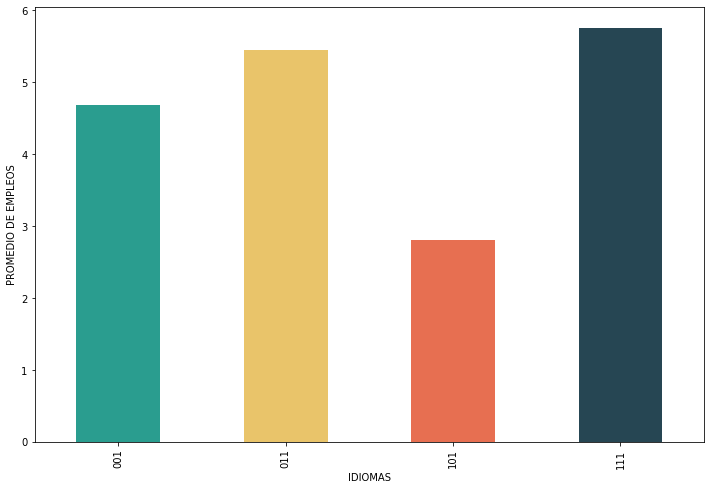

In [74]:
coloresMedallas = ['#2a9d8f','#e9c46a','#e76f51', '#264653']

group_languages = DF_COUNT.groupby(['count_languages']).mean()['count_experience']
group_languages.plot(kind = 'bar', color=coloresMedallas,xlabel='IDIOMAS', ylabel='PROMEDIO DE EMPLEOS' ,figsize=(12,8))

In [75]:
fig = px.pie(DF_COUNT, names = "count_languages", title = "Categorias", hole = 0.5,
            width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

#3° Analytical task

In [76]:
group_contacts = DF_COUNT.groupby(['category_contacts']).mean()['count_experience']
group_contacts

category_contacts
0.0      3.367876
50.0     4.383929
100.0    4.883178
200.0    5.182540
300.0    5.545455
400.0    6.064777
500.0    9.391304
Name: count_experience, dtype: float64

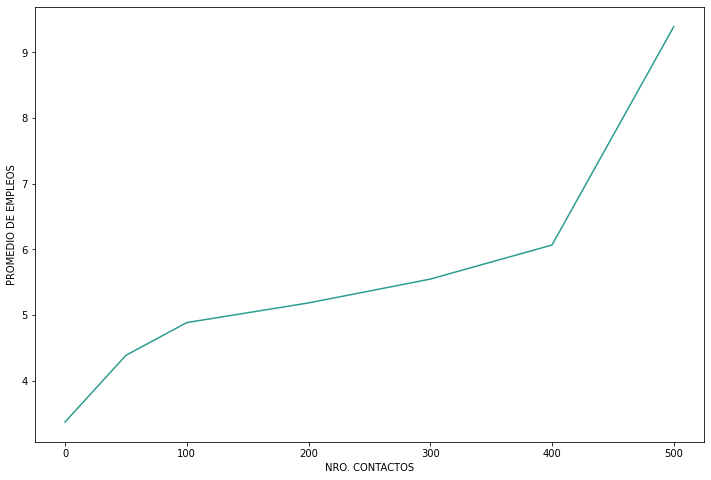

In [78]:
group_contacts.plot(kind = 'line', color=coloresMedallas, title='', xlabel='NRO. CONTACTOS', ylabel='PROMEDIO DE EMPLEOS', figsize=(12,8))

#NLP


#**Tokenizacion de NLTK**

In [25]:
def remove_signs(val):
  characters = r"'[]"+'"'
  valor = ''.join( x for x in val if x not in characters)
  return valor

In [27]:
import nltk
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_csv('/content/export_dataframe.csv')
row = data['skills']
text = ''
for i in row:
  text += remove_signs(i)
  
text

'Inteligencia empresarial, Business Intelligence, Spanish, Calidad de datos, English, Analytics, Data Quality, GIS, Geomarketing, Market Research, Market Analysis, QlikView, Microsoft SQL Server, Data Mining, Data Analysis, Business Analysis, Sales Management, Dashboard, Customer Insight, Inteligencia empresarial, Business Intelligence, Calidad de datos, Analytics, Data Quality, Geomarketing, Market Research, Market Analysis, Data Mining, Data Analysis, Business Analysis, Sales Management, Dashboard, Customer Insight, GIS, QlikView, Microsoft SQL Server, Spanish, EnglishMetodologías ágiles, Liderazgo de equipos, Gobierno TI, Modelado de datos, Business Intelligence, Cuerpo de conocimientos para la administración de proyectos (PMBOK), Gestión de proyectos, PMI, Business Analysis, Extraer, transformar, cargar (ETL), Ingeniería de sistemas, Planificación estratégica, Microsoft SQL Server, Microsoft Office, Microsoft Project, Microsoft Excel, SQL, Negociación, Cassandra, Apache Spark, Meto

In [28]:
# texto = 'En los E.U. esa postal cuesta $20.00'


pattern = r'''(?x)
              (?:[A-Z]\.)+
              | \w+(?:-\w+)*
              | \$?\d+(?:\.\d+)?%?
              | \.\.\.
              | [][.,;"'?():-_`]
'''

tokens = nltk.regexp_tokenize(text, pattern)


In [29]:
new_tokens = []
text = ''
for i in tokens:
  if len(i) > 3:
    new_tokens.append(i.lower())
    text += f'{i} '


In [30]:
from nltk.probability import FreqDist
fdist = FreqDist(new_tokens)


In [31]:
fdist.most_common(20)

[('microsoft', 2120),
 ('gestión', 768),
 ('office', 708),
 ('análisis', 603),
 ('proyectos', 589),
 ('excel', 587),
 ('liderazgo', 517),
 ('equipos', 466),
 ('empresarial', 446),
 ('server', 445),
 ('planificación', 442),
 ('datos', 410),
 ('project', 381),
 ('estratégica', 373),
 ('estrategia', 351),
 ('management', 350),
 ('desarrollo', 310),
 ('software', 262),
 ('word', 255),
 ('atención', 252)]

<function matplotlib.pyplot.show(*args, **kw)>

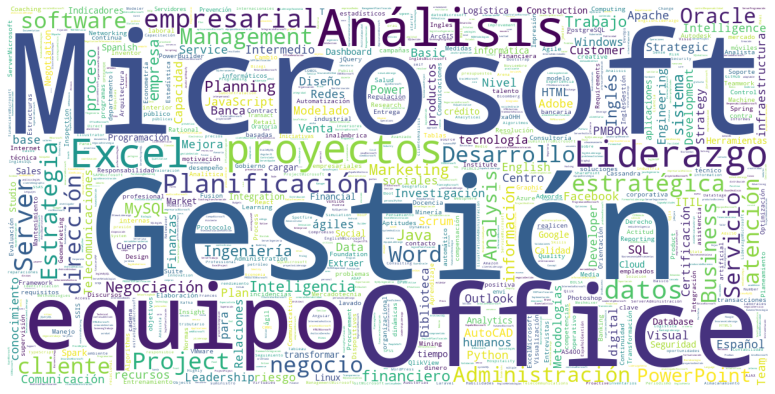

In [32]:
#Nube de palabras para titulos
# text = " ".join(i for i in DF_NEWS.title)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show